In [4]:

# 1. Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

# 2. Load Data
# Download dataset from: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
# Make sure the CSV files 'Fake.csv' and 'True.csv' are in your working folder.

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')


In [6]:

# 3. Add Labels and Combine
fake['label'] = 0  # fake news
true['label'] = 1  # real news

df = pd.concat([fake, true], axis=0).reset_index(drop=True)


In [7]:

# 4. Data Cleaning Function
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['text'] = df['title'] + ' ' + df['text']  # combine title & text
df['text'] = df['text'].apply(clean_text)


In [8]:

# 5. Train-Test Split
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

# 6. Vectorize Text
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:

# 7. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [13]:
import pickle

# Save the trained model
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


Accuracy: 0.9899

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



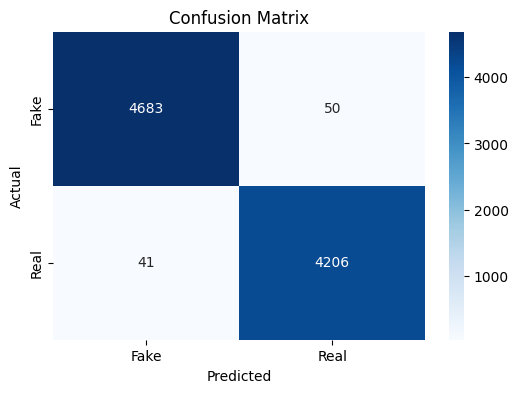

In [12]:

# 8. Predictions and Evaluation
y_pred = model.predict(X_test_tfidf)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
